In [1]:
from time_series_generator import TimeSeriesGenerator
from time_series_ddpm_model import TimeSeriesDDPM
import numpy as np
from statsmodels.tsa import ar_model
import matplotlib.pyplot as plt
import network_architectures
import utils
from statsmodels.tsa.arima.model import ARIMA

In [12]:
garch_data=TimeSeriesGenerator.generate_garch_11_series(500, 1000, 0.1, 0.4, 0.3, 100)

In [13]:
series=garch_data.numpy()

In [46]:
series.shape[1]

1000

In [49]:
tsmodel=ARIMA(series[0], order=(1, 0, 1), trend="n")

In [16]:
result=tsmodel.fit()

In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -789.150
Date:                Mon, 07 Apr 2025   AIC                           1584.300
Time:                        00:00:22   BIC                           1599.023
Sample:                             0   HQIC                          1589.896
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1081      0.337     -0.321      0.748      -0.768       0.552
ma.L1          0.1873      0.333      0.562      0.574      -0.466       0.841
sigma2         0.2838      0.011     26.277      0.000       0.263       0.305
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                37.45
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.11
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
params = utils.ts_kurtosis_estimation(garch_data)

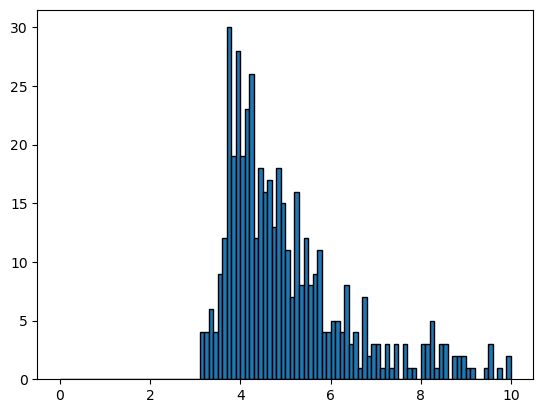

In [51]:
plt.hist(params, bins=100, range=(0,10), edgecolor='black')
plt.show()

In [23]:
from network_architectures import HybridCNNLSTMNet
custom_net = HybridCNNLSTMNet(input_dim=1, conv_channels=16, lstm_hidden_dim=32, num_lstm_layers=2)
# Create the DDPM model using the custom network.
ddpm_model = TimeSeriesDDPM(net=custom_net, T=1000)

In [13]:
#from transformer_architecture import TransformerNet

In [15]:
#custom_transformer = TransformerNet(
#    input_dim=1,
#    embed_dim=16,
#    num_layers=2,
#    nhead=4,
#    dim_feedforward=64,
#    dropout=0.1,
#    use_positional_encoding=True
#)

## Instantiate the DDPM model with the transformer network.
#ddpm_model = TimeSeriesDDPM(net=custom_transformer, T=1000)


In [25]:
ddpm_model.train_model(garch_data, num_epochs=40, plot=False)

Epoch 1, Loss: 0.9515123021602631
Epoch 2, Loss: 0.5633212447166442
Epoch 3, Loss: 0.29239591240882873
Epoch 4, Loss: 0.2169947935640812
Epoch 5, Loss: 0.2024497166275978
Epoch 6, Loss: 0.20825718581676483
Epoch 7, Loss: 0.1921457253396511
Epoch 8, Loss: 0.18746242847293615
Epoch 9, Loss: 0.18709633618593216
Epoch 10, Loss: 0.19886887706816198
Epoch 11, Loss: 0.21538845896720887
Epoch 12, Loss: 0.17536010393872858
Epoch 13, Loss: 0.1789027978479862
Epoch 14, Loss: 0.21857699126005173
Epoch 15, Loss: 0.20356049805879592
Epoch 16, Loss: 0.18936425484716893
Epoch 17, Loss: 0.18994746681302785
Epoch 18, Loss: 0.20137015338987113
Epoch 19, Loss: 0.1755616979673505
Epoch 20, Loss: 0.19322024881839753
Epoch 21, Loss: 0.18590192295610905
Epoch 22, Loss: 0.16971901051700114
Epoch 23, Loss: 0.1829999715834856
Epoch 24, Loss: 0.18598976434208453
Epoch 25, Loss: 0.1791480863466859
Epoch 26, Loss: 0.1776658958941698
Epoch 27, Loss: 0.19748110704123975
Epoch 28, Loss: 0.18959172872826457
Epoch 29, L

In [52]:
print(ddpm_model)

TimeSeriesDDPM(
  (net): HybridCNNLSTMNet(
    (conv): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (lstm): LSTM(17, 32, num_layers=2, batch_first=True)
    (fc): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [44]:
garch_data.shape

torch.Size([500, 1000, 1])

In [27]:
import torch

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generated_series=ddpm_model.sample(seq_length=50, device=device, num_samples=100)

In [53]:
simulated_params=utils.ts_kurtosis_estimation(generated_series)

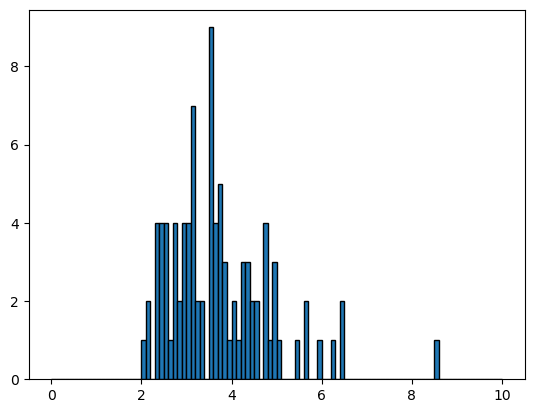

In [54]:
plt.hist(simulated_params, bins=100, range=(0,10), edgecolor='black')
plt.show()

In [38]:
import os
def build_path(*folders, file_name=None):
    """
    Returns the current directory appended with any additional folder names provided,
    and optionally appends a file name at the end.

    Parameters:
    *folders (str): A variable number of folder names to append to the current directory.
    file_name (str, optional): The file name to append to the path.

    Returns:
    str: The resulting full path.
    """
    # Start with the current directory and add any additional folders
    path = os.path.join(os.getcwd(), *folders)
    # If a file name is provided, append it to the path
    if file_name:
        path = os.path.join(path, file_name)
    return path

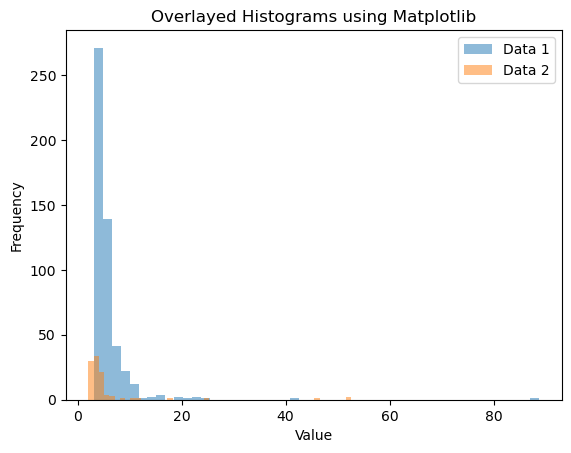

In [42]:
plt.hist(params, bins=50, alpha=0.5, label='Data 1')
plt.hist(simulated_params, bins=50, alpha=0.5, label='Data 2')

plt.legend(loc='upper right')
plt.title("Overlayed Histograms using Matplotlib")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.savefig(build_path('output','prueba.jpg'))